In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski

In [169]:
image = cv.imread("/home/dima/Documents/альбрехт/обработка изображений/default/images/Img (copy 7).png")

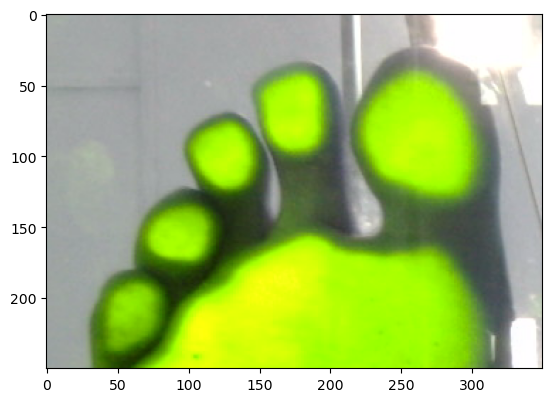

In [4]:
myRoi = image[250:500, 400:750]
plt.imshow(myRoi)

In [5]:
myRoi.shape

(250, 350, 3)

Функция $f(x)$ в данном случае является горизонтальной полосой высотой в один пиксель на какой-то высоте $y_0$ изображения:
$$f(x) = image[y_0]$$ $y_0$
Одномерная производная в точке для изображения определяется так:
$$\frac{df(x)}{dx} = f(x + 1) - f(x)$$

In [12]:
# конвертируем изображение из uint8 в float и нормализируем

myRoi = ski.util.img_as_float(myRoi)

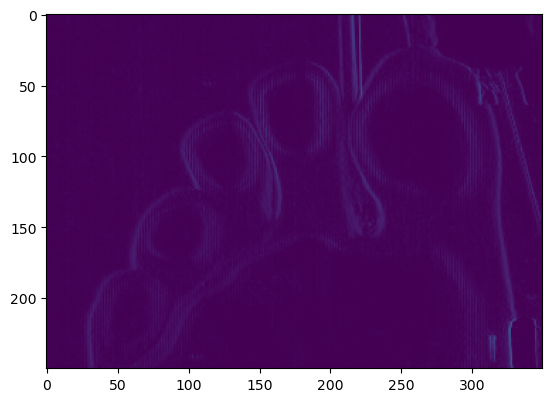

In [18]:

w = myRoi.shape[1]
h = myRoi.shape[0]

deriv1 = np.zeros((h, w))

for y in range(h):
    f = myRoi[y]
    for x in range(0, w - 1):
        deriv1[y][x] = np.sum(np.abs(f[x + 1] - f[x])) * 1/3
        # print(f[x], f[x + 1], np.sum(np.abs(f[x + 1] - f[x])) * 1/3)

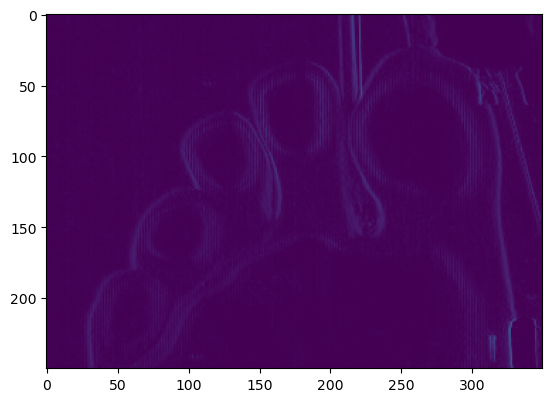

In [19]:
plt.imshow(deriv1, vmin=0., vmax=1.)

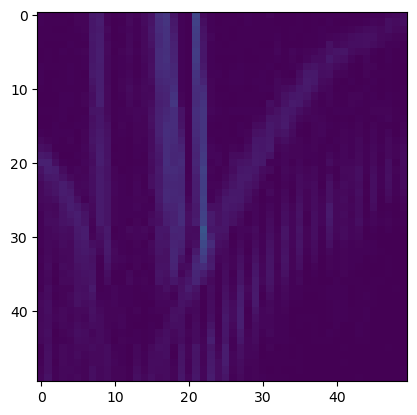

In [20]:
plt.imshow(deriv1[25:75, 200:250], vmin=0., vmax=1.)

In [74]:
def cropByMask(image, xy, mn):
    x, y = xy
    m, n = mn

    assert m == n
    assert m % 2 == 1
    
    dy = (m - 1) // 2
    dx = (n - 1) // 2
    
    return image[y - dy : y + dy + 1, x - dx : x + dx + 1]

In [99]:
# max pooling filter

filteredImage = np.copy(deriv1)

maskSize = 5
maskPadding = maskSize - 1 // 2
maskCenterIndex = (maskSize * maskSize - 1) // 2
mn = (maskSize, maskSize)

for y in range(maskPadding, h - maskPadding):
    # f = myRoi[y]
    for x in range(maskPadding, w - maskPadding):
        # maskRegion = deriv1[y - 1:y + 1 + 1, x - 1: x + 1 + 1].flatten()
        # print(maskRegion)
        maskRegion = cropByMask(deriv1, (x, y), mn).flatten()
        # print(maskRegion)
        maxElementIndex = np.argmax(maskRegion)
        # print(maskRegion)
        if maxElementIndex != maskCenterIndex:
            filteredImage[y, x] = 0.


In [100]:
negFilteredImage = ski.util.invert(filteredImage)

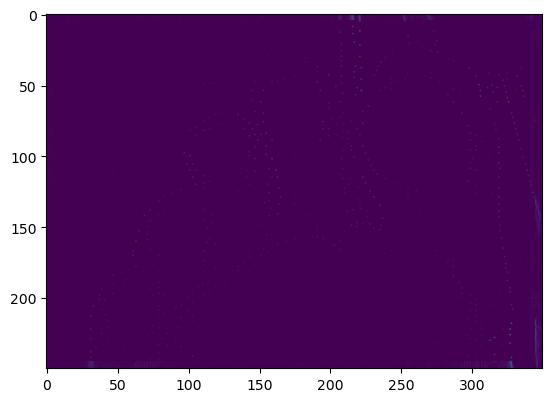

In [101]:
plt.imshow(filteredImage, vmin=0., vmax=1.)

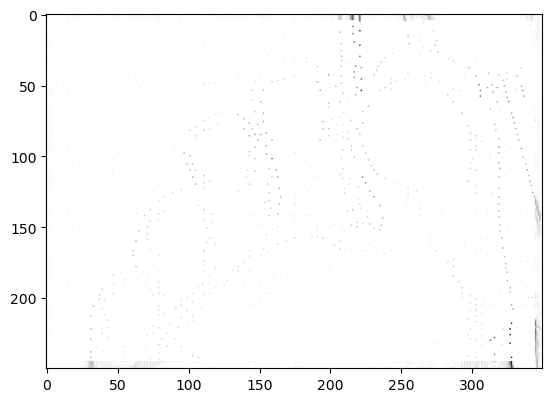

In [102]:
plt.imshow(negFilteredImage, cmap='gray')

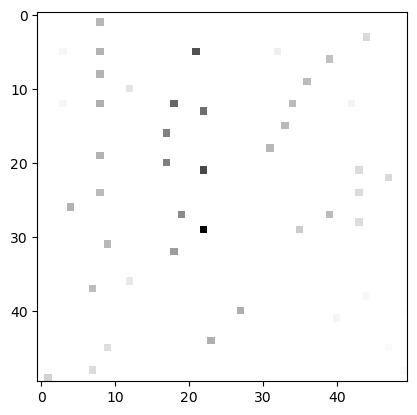

In [103]:
plt.imshow(negFilteredImage[25:75, 200:250], cmap='gray')

In [72]:
a = np.arange(5*5)
a = a.reshape((5,5))
print(a)
print(a[0:3, 0:3])
a[0:3, 0:3].flatten()

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
[[ 0  1  2]
 [ 5  6  7]
 [10 11 12]]


array([ 0,  1,  2,  5,  6,  7, 10, 11, 12])

In [181]:
def derivative1(image):
    w = image.shape[1]
    h = image.shape[0]
    maskSize = 3
    maskPadding = maskSize - 1 // 2
    # maskCenterIndex = (maskSize * maskSize - 1) // 2
    mn = (maskSize, maskSize)

    deriv1 = np.zeros((h, w))

    # kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    kernel = np.array([
        [0, -1, 0],
        [0, 2, -1],
        [0, 0, 0]
    ])
    
    for y in range(maskPadding, h - maskPadding):
        # f = myRoi[y]
        for x in range(maskPadding, w - maskPadding):
            # maskRegion = deriv1[y - 1:y + 1 + 1, x - 1: x + 1 + 1].flatten()
            # print(maskRegion)
            maskedRegion = cropByMask(image, (x, y), mn)
            deriv1[y, x] = np.sum(maskedRegion * kernel)
            # deriv1[y][x] = np.sum(np.abs(f[x + 1] - f[x])) * 1/3
            # print(f[x], f[x + 1], np.sum(np.abs(f[x + 1] - f[x])) * 1/3)

    return deriv1

In [182]:
def derivative2(image):
    w = image.shape[1]
    h = image.shape[0]
    maskSize = 3
    maskPadding = maskSize - 1 // 2
    # maskCenterIndex = (maskSize * maskSize - 1) // 2
    mn = (maskSize, maskSize)

    deriv1 = np.zeros((h, w))

    # kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
    kernel = np.array([
        [1, 1, 1],
        [1, -8, 1],
        [1, 1, 1]
    ])
    
    for y in range(maskPadding, h - maskPadding):
        # f = myRoi[y]
        for x in range(maskPadding, w - maskPadding):
            # maskRegion = deriv1[y - 1:y + 1 + 1, x - 1: x + 1 + 1].flatten()
            # print(maskRegion)
            maskedRegion = cropByMask(image, (x, y), mn)
            deriv1[y, x] = np.sum(maskedRegion * kernel)
            # deriv1[y][x] = np.sum(np.abs(f[x + 1] - f[x])) * 1/3
            # print(f[x], f[x + 1], np.sum(np.abs(f[x + 1] - f[x])) * 1/3)

    return deriv1

In [183]:
deriv1 = derivative1(ski.util.img_as_float(image))

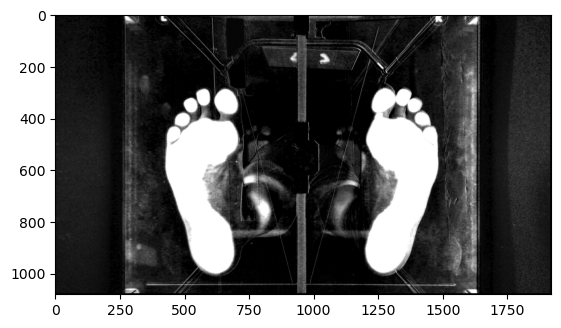

In [184]:
plt.imshow(deriv1, cmap='gray', vmin=0., vmax=1.)

In [185]:
deriv2 = derivative2(ski.util.img_as_float(image))

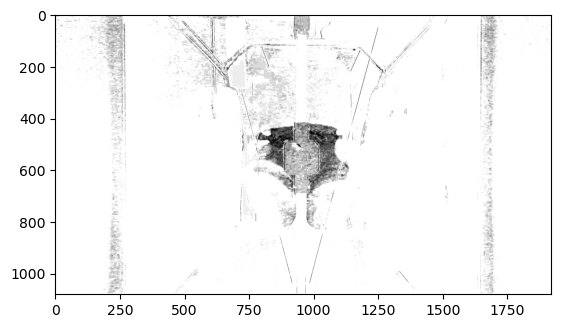

In [188]:
plt.imshow(1-deriv2, cmap='gray', vmin=0., vmax=1.)

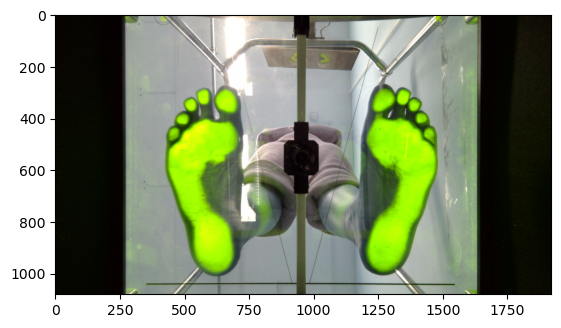

In [187]:
plt.imshow(image)

In [105]:
a = np.arange(24)
a = a.reshape((6, 4))
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [108]:
np.sum(a, axis=0)

array([60, 66, 72, 78])

In [191]:
# def cropByEvenMask(image, xy, dim, centerPixelM, centerPixelN):
#     x, y = xy

#     assert dim % 2 == 0

#     dy1 = min(centerPixelM - 1, dim - centerPixelM)
#     dy2 = max(centerPixelM - 1, dim - centerPixelM)
#     dx1 = min(centerPixelN - 1, dim - centerPixelN)
#     dx2 = min(centerPixelN - 1, dim - centerPixelN)
#     return image[y - d

def cropByEvenMask(image, xy):
    x, y = xy
    
    return image[y - 1: y + 1, x - 1: x + 1,:]

In [240]:
def derivative1_variant2(image, kernel):
    w = image.shape[1]
    h = image.shape[0]
    maskSize = 2
    maskPadding = 1
    # maskCenterIndex = (maskSize * maskSize - 1) // 2
    mn = (maskSize, maskSize)

    deriv1 = np.zeros((h, w))

    # kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    # kernel = np.array([
    #     [-1, 0],
    #     [0, 1]
    # ])

    kernel = np.expand_dims(kernel, 2)
    kernel = np.repeat(kernel, 3, axis=2)
    
    for y in range(maskPadding, h - maskPadding):
        # f = myRoi[y]
        for x in range(maskPadding, w - maskPadding):
            # maskRegion = deriv1[y - 1:y + 1 + 1, x - 1: x + 1 + 1].flatten()
            # print(maskRegion)
            maskedRegion = cropByEvenMask(image, (x, y))
            deriv1[y, x] = 1/3 * np.sum(maskedRegion * kernel)
            # deriv1[y][x] = np.sum(np.abs(f[x + 1] - f[x])) * 1/3
            # print(f[x], f[x + 1], np.sum(np.abs(f[x + 1] - f[x])) * 1/3)

    return deriv1

In [241]:
fImage = ski.util.img_as_float(image)

In [242]:
kernel = np.array([
    [-1, 0],
    [0, 1]
])

dFImage1 = derivative1_variant2(fImage, kernel)

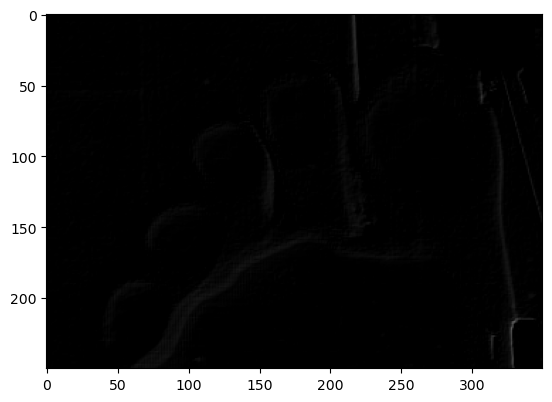

In [247]:
plt.imshow(dFImage1[250:500, 400:750], cmap='gray', vmin=0., vmax=1.)

In [244]:
kernel = np.array([
    [0, -1],
    [1, 0]
])
dFImage2 = derivative1_variant2(fImage, kernel)

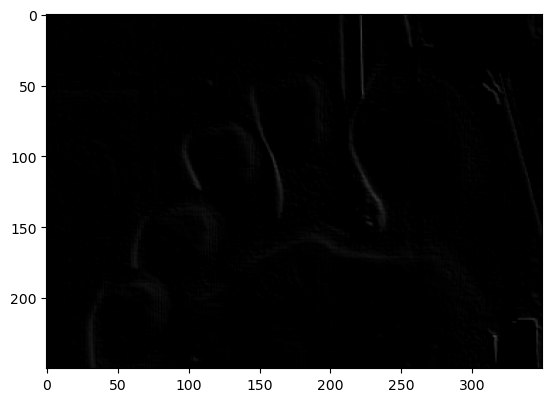

In [248]:
plt.imshow(dFImage2[250:500, 400:750], cmap='gray', vmin=0., vmax=1.)

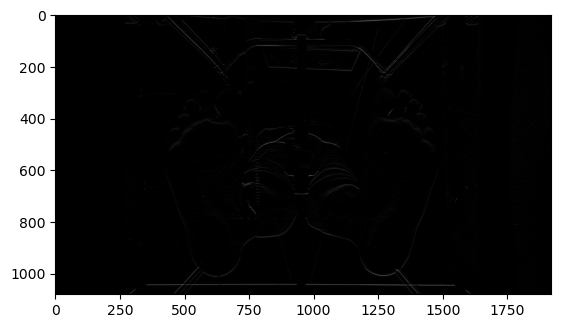

In [246]:
plt.imshow(dFImage1 + dFImage2, cmap='gray', vmin=0., vmax=1.)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-2.75686275, -2.19176471, -1.62666667, -1.06156863, -0.49647059,
         0.06862745,  0.63372549,  1.19882353,  1.76392157,  2.32901961,
         2.89411765]),
 <a list of 1920 BarContainer objects>)

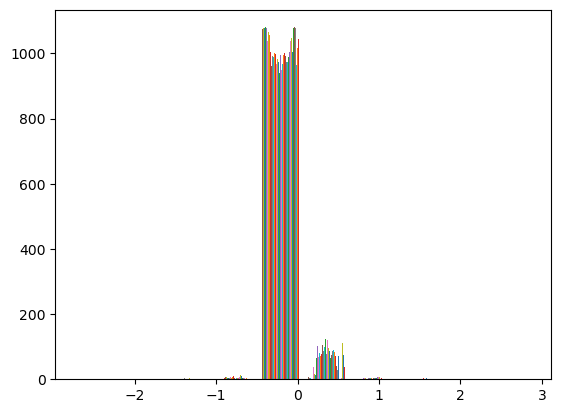

array([-1.4745098 , -1.45882353, -1.41960784, ...,  1.53333333,
        1.56078431,  1.64313725])

In [238]:
kernel = np.arange(9 * 3)
kernel = kernel.reshape(3,3,3)

kernel

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [239]:
np.sum(kernel)

351